## Titanic Survivor Data Column Details

PassengerIdUnique ID of the passenger 

Pclass Passenger's class (1st, 2nd, or 3rd)

Name Passenger's name

Sex Passenger's sex

Age Passenger's age

SibSp Number of siblings/spouses aboard the Titanic

Parch Number of parents/children aboard the Titanic

Ticket number

Fare paid for ticket

Cabin number

Embarked Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno
%matplotlib inline

In [2]:
master_train_df = pd.read_csv('titanic/train.csv')
master_test_df = pd.read_csv('titanic/test.csv')

In [3]:
gender_submission = pd.read_csv('titanic/gender_submission.csv')

In [4]:
master_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
master_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
master_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22f4a2e8>,
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

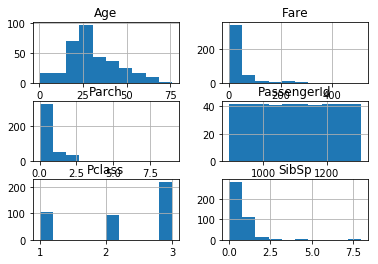

In [7]:
plt.figure(figsize=(20,20))
master_test_df.hist()

In [8]:
master_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Check for missing values
Its always good to check if our data contianing any missing values

In [9]:
train_eda = pd.DataFrame()
train_eda = master_train_df

In [10]:
#createing two more dataframe. 

df_bin = pd.DataFrame()  # for discreated continous numbers e.g. 1-10, 10-20, 20-30....
df_conti = pd.DataFrame()   #for continous e.g. number 1-100

In [11]:
train_eda.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
train_eda.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Feature Exploration 

#### Target Feature : Survived
0: Not survived  1: survived

0    549
1    342
Name: Survived, dtype: int64


Text(0.5, 1.0, 'Survior Ratio')

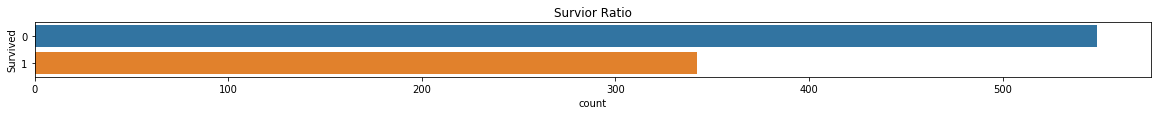

In [13]:
plt.figure(figsize=(20,1))
sns.countplot(data=train_eda,y='Survived')
print(train_eda.Survived.value_counts())
plt.title("Survior Ratio")

In [14]:
df_bin['Survived'] = train_eda['Survived']
df_conti['Survived'] = train_eda['Survived']

#### Feature : Pclass
1: Ist, 2: 2nd, 3: 3rd   nomial variables(categories) because they can't be ranked


3    491
1    216
2    184
Name: Pclass, dtype: int64


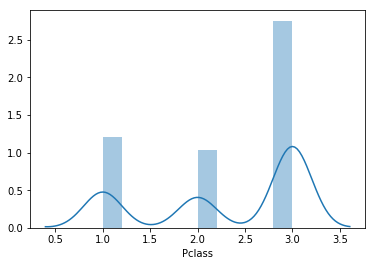

In [15]:
sns.distplot(train_eda.Pclass)
print(train_eda.Pclass.value_counts())

In [16]:
df_bin['Pclass'] = train_eda['Pclass']
df_conti['Pclass'] = train_eda['Pclass']

In [17]:
df_conti.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


### Feature : Sex

male      577
female    314
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Male Female Ratio')

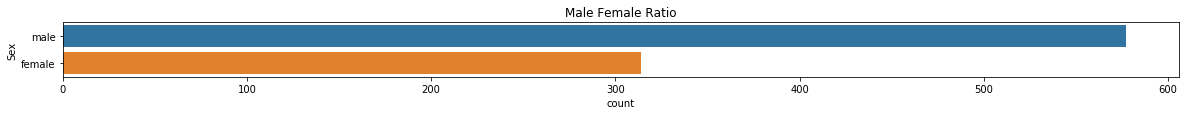

In [18]:
plt.figure(figsize=(20,1))
sns.countplot(data=train_eda,y='Sex')
print(train_eda.Sex.value_counts())
plt.title("Male Female Ratio")

In [19]:
df_bin['Sex'] = train_eda['Sex']
df_bin['Sex'] = np.where(df_bin['Sex']=='female',1,0)
df_conti['Sex'] = train_eda['Sex']

In [20]:
train_eda.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [21]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


In [22]:
df_bin.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

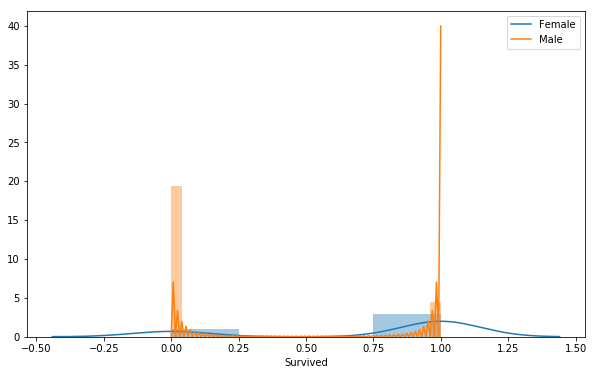

In [23]:
plt.figure(figsize=(10,6))
sns.distplot(df_bin.loc[df_bin['Sex'] == 1]['Survived'], kde_kws={'label':'Female'})
sns.distplot(df_bin.loc[df_bin['Sex'] == 0]['Survived'],kde_kws={'label':'Male'})
#0=Male , 1= Female

### Feature : Age

In [24]:
#Missing values
train_eda.Age.isnull().sum()

177

### Feature: SibSp
no of siblings or spouse on board

In [25]:
df_bin['SibSp'] = train_eda['SibSp']
df_conti['SibSp'] = train_eda['SibSp']

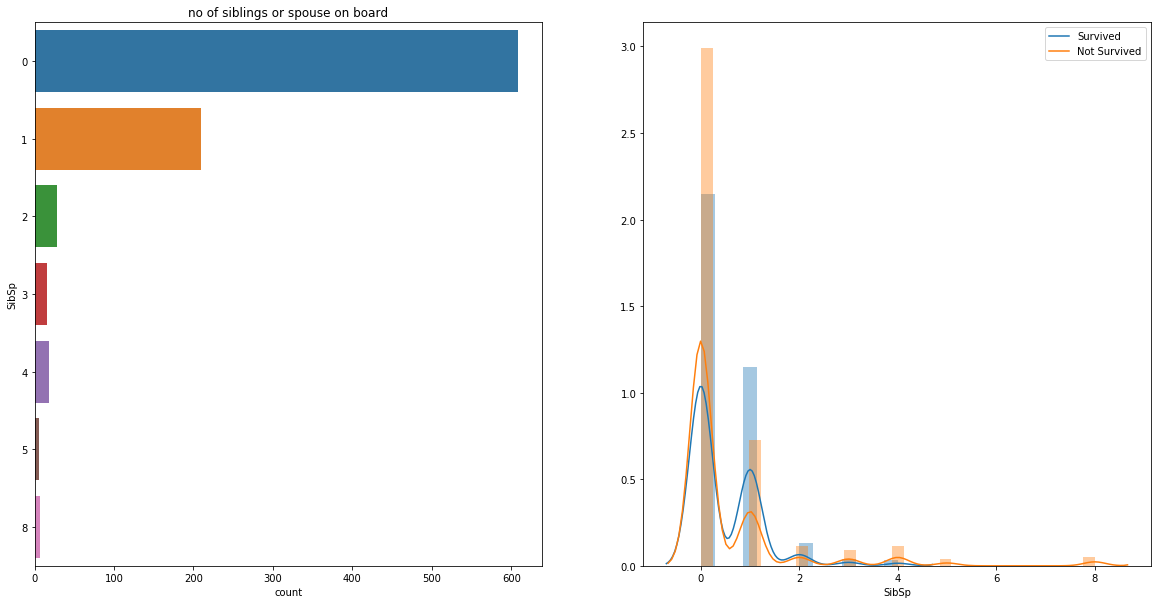

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.countplot(data=df_bin, y = 'SibSp')
plt.title('no of siblings or spouse on board')
plt.subplot(1, 2, 2)
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['SibSp'], kde_kws={'label':'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['SibSp'],kde_kws={'label':'Not Survived'})

### Feature: Parch

In [27]:
df_bin['Parch'] = train_eda['Parch']
df_conti['Parch'] = train_eda['Parch']

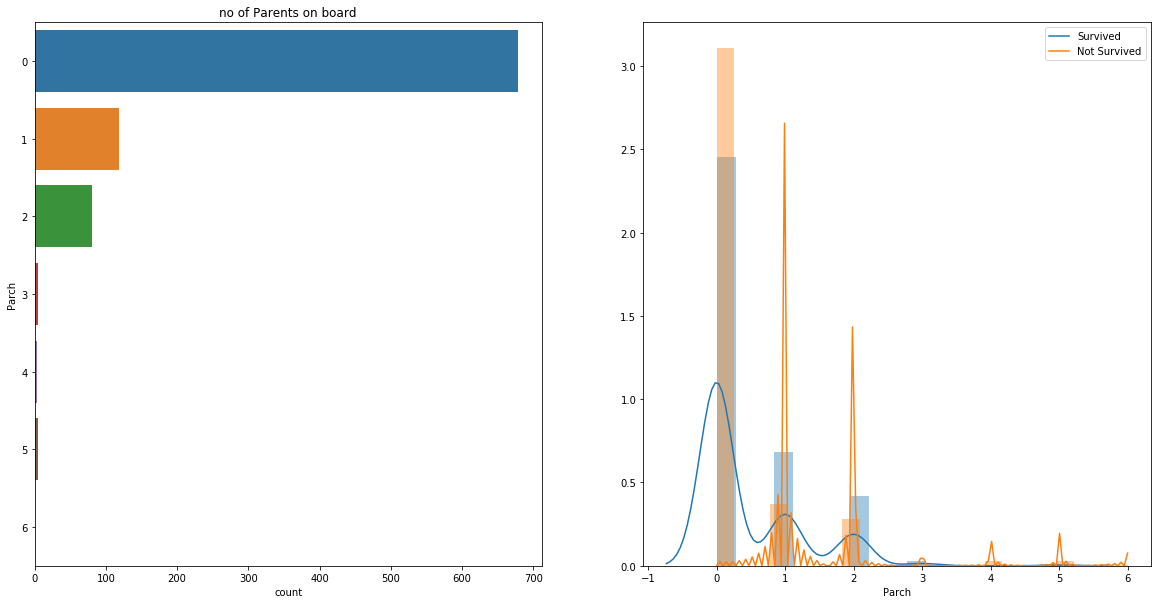

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.countplot(data=df_bin, y = 'Parch')
plt.title('no of Parents on board')
plt.subplot(1, 2, 2)
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Parch'], kde_kws={'label':'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Parch'],kde_kws={'label':'Not Survived'})

### Feature : Ticket

In [29]:
#train_eda['Ticket_class'] = train_eda.groupby(train_eda['Pclass'])['Ticket']

### Feature: Fare

In [30]:
df_bin['Fare'] = pd.cut(train_eda['Fare'],5)
df_conti['Fare'] = train_eda['Fare']

In [31]:
df_bin['Fare'].min()

Interval(-0.512, 102.466, closed='right')

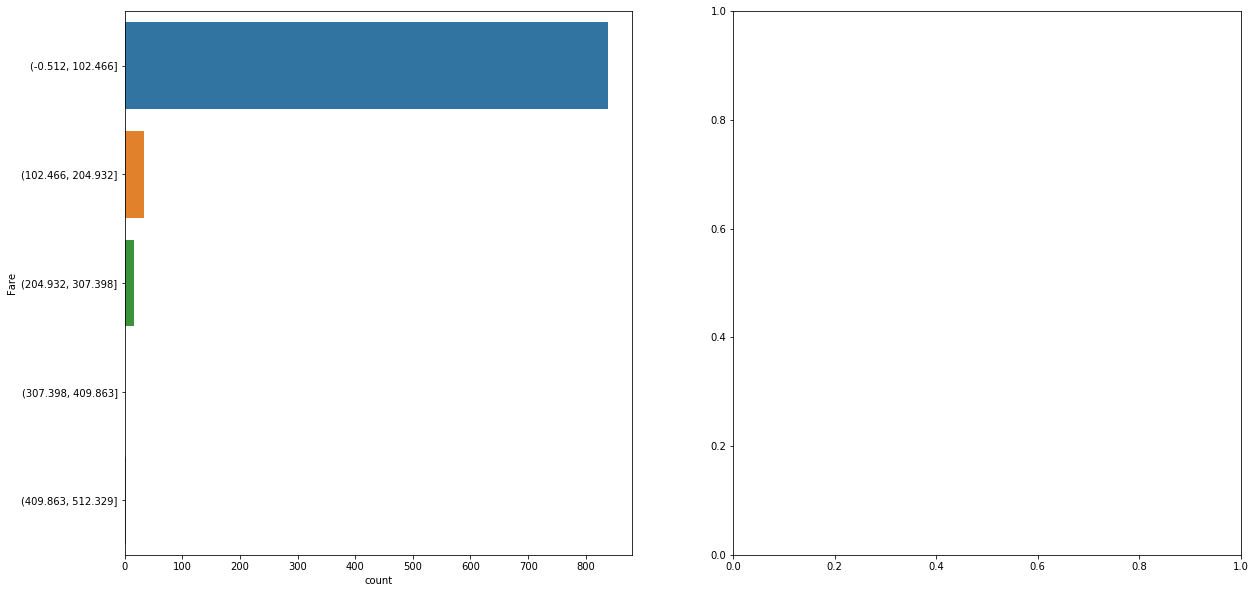

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.countplot(data=df_bin, y = 'Fare')
plt.subplot(1, 2, 2)
#sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Fare'], kde_kws={'label':'Survived'})
#sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Fare'],kde_kws={'label':'Not Survived'},kde=True, hist=True, hist_kws={"range": [-0.512,512]})

### Feature: Embarked
The port where the passenger boarded the Titanic.

C = Cherbourg, Q = Queenstown, S = Southampton

In [33]:
train_eda.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
df_bin['Embarked'] = train_eda['Embarked']
df_conti['Embarked'] = train_eda['Embarked']

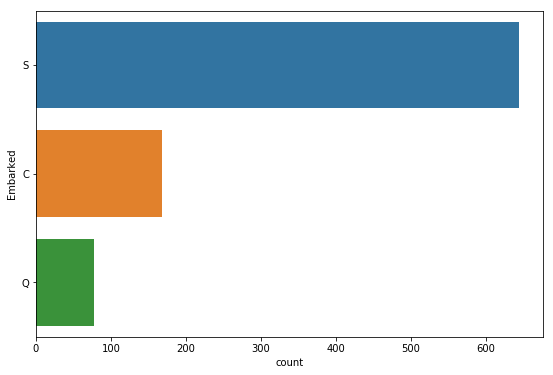

In [35]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(data=df_bin, y = 'Embarked')

In [36]:
df_bin = df_bin.dropna(subset=['Embarked'])
df_conti = df_conti.dropna(subset=['Embarked'])

In [37]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


### Feature Encoding

In [38]:
df_conti.dtypes

Survived      int64
Pclass        int64
Sex          object
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

##### One hot encoding for categorical data

In [39]:

df_embarked_one_hot = pd.get_dummies(df_conti['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_conti['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_conti['Pclass'], 
                                   prefix='pclass')

In [40]:
df_conti_encod = pd.concat([df_conti,df_embarked_one_hot,df_sex_one_hot,df_plcass_one_hot],axis=1)

In [41]:
df_conti_encod = df_conti_encod.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [42]:
df_conti_encod.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


### Lets start Building Model

In [43]:
model_df = pd.DataFrame()
model_df = df_conti_encod

In [44]:
X = model_df.drop('Survived',axis=1)
y = model_df['Survived']

In [45]:
X.shape

(889, 11)

In [46]:
y.shape

(889,)

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [48]:
lr = LogisticRegression()

In [49]:
lr.fit(X,y)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
y_pred = cross_val_predict(LogisticRegression(),X,y,cv=10,n_jobs=-1)

In [51]:
reg_score = round(lr.score(X, y) * 100, 2)
reg_cv_score = round(accuracy_score(y,y_pred)*100,2)

In [52]:
print('Accuracy: ', reg_score)
print('Accuracy Cv : ', reg_cv_score)

Accuracy:  79.98
Accuracy Cv :  79.42


### K- Neariest Neighbour

In [53]:
knn = KNeighborsClassifier()

In [54]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [55]:
k_pred = cross_val_predict(KNeighborsClassifier(),X,y,cv=10,n_jobs=-1)

In [56]:
knn_score = round(knn.score(X, y) * 100, 2)
knn_cv_score = round(accuracy_score(y,k_pred)*100,2)

In [57]:
print('Accuracy: ', knn_score)
print('Accuracy Cv : ', knn_cv_score)

Accuracy:  83.46
Accuracy Cv :  76.72


### RandomForest Classifier

In [58]:
rfc = RandomForestClassifier()

In [59]:
rfc.fit(X,y)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
rfc_pred = cross_val_predict(RandomForestClassifier(),X,y,cv=10,n_jobs=-1)

In [61]:
rfc_score = round(rfc.score(X, y) * 100, 2)
rfc_cv_score = round(accuracy_score(y,rfc_pred)*100,2)

In [62]:
print('Accuracy: ', rfc_score)
print('Accuracy Cv : ', rfc_cv_score)

Accuracy:  91.79
Accuracy Cv :  80.65


### GradientBoosting Classifier

In [63]:
gbt = GradientBoostingClassifier()
gbt.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [64]:
gbt_pred = cross_val_predict(GradientBoostingClassifier(),X,y,cv=10,n_jobs=-1)

In [65]:
gbt_score = round(gbt.score(X, y) * 100, 2)
gbt_cv_score = round(accuracy_score(y,gbt_pred)*100,2)

In [66]:
print('Accuracy: ', gbt_score)
print('Accuracy Cv 10 Folds: ', gbt_cv_score)

Accuracy:  86.61
Accuracy Cv 10 Folds:  80.65


# Model Results

### Accuracy Score

In [67]:
cv_model = pd.DataFrame({'Model':['LogisticRegression','KNN','RandomForest','GradientBoost'],
                      'Score':[reg_cv_score,knn_cv_score,rfc_cv_score,gbt_cv_score]})
cv_model.sort_values(by='Score',ascending=False)

,Model,Score
2,RandomForest,80.65
3,GradientBoost,80.65
0,LogisticRegression,79.42
1,KNN,76.72


### Feature importance

Feature importance to identify which feature has most impact on building model

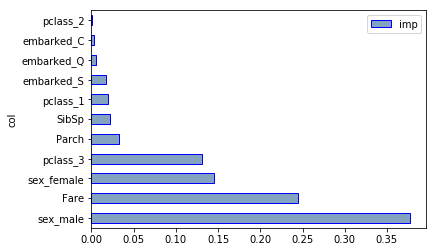

In [68]:
feature_imp = pd.DataFrame({'imp':gbt.feature_importances_,'col':X.columns})
sorted_df = feature_imp.sort_values(by=['imp','col'],ascending=False)
sorted_df.plot(kind='barh',x='col',y='imp',color=(0.2, 0.4, 0.6, 0.6),edgecolor='blue')

# Submission

In [69]:
X.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [70]:
y.shape

(889,)

In [71]:
test_col=X.columns
test_col

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [72]:
master_test_df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']].head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,0,0,7.8292,Q
1,3,female,1,0,7.0000,S
2,2,male,0,0,9.6875,Q
3,3,male,0,0,8.6625,S
4,3,female,1,1,12.2875,S


Perform one hot encoding to inline test dataset to train dataset

In [73]:
dummy_test_df = pd.DataFrame()
dummy_test_df = master_test_df

In [74]:
test_embarked_dummies = pd.get_dummies(dummy_test_df['Embarked'],prefix='embarked')
test_sex_dummies = pd.get_dummies(dummy_test_df['Sex'],prefix='sex')
test_pclass_dummies = pd.get_dummies(dummy_test_df['Pclass'],prefix='pclass')

In [75]:
dummy_test_df = pd.concat([dummy_test_df,test_embarked_dummies,test_sex_dummies,test_pclass_dummies],axis=1)

In [76]:
dummy_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [77]:
test_col = X.columns
test_col

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [78]:
#dummy_test_df.fillna(subset=['Fare'],inplace=True)
#master_test_df.mean()
dummy_test_df.Fare.isnull().sum()

0

In [79]:
predict = gbt.predict(dummy_test_df[test_col])

In [80]:
predict[:20]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [81]:
dummy_test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'embarked_C', 'embarked_Q',
       'embarked_S', 'sex_female', 'sex_male', 'pclass_1', 'pclass_2',
       'pclass_3'],
      dtype='object')

In [82]:
submit_df = pd.DataFrame()

In [83]:
submit_df['PassengerId'] = dummy_test_df['PassengerId']
submit_df['Survived'] = predict

In [84]:
submit_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [85]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [86]:
if len(submit_df) == len(dummy_test_df):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submit_df)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [87]:
submit_df.to_csv('submission.csv',index=False)
print("Submission Ready")

Submission Ready


In [88]:
check_submission = pd.read_csv('submission.csv')

In [89]:
check_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB
